In [1]:
import fitbit
import gather_keys_oauth2 as Oauth2
import pandas as pd 
from pandas.io.json import json_normalize
from datetime import datetime as dt
import matplotlib as plt
CLIENT_ID = '22CWFN'
CLIENT_SECRET = 'e74eee4d9bf42dcd01e177aeca9345ac'

In [2]:
server = Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN = str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN = str(server.fitbit.client.session.token['refresh_token'])
auth2_client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

[15/Apr/2018:09:34:30] ENGINE Listening for SIGTERM.
[15/Apr/2018:09:34:30] ENGINE Bus STARTING
[15/Apr/2018:09:34:30] ENGINE Set handler for console events.
CherryPy Checker:
The Application mounted at '' has an empty config.

[15/Apr/2018:09:34:30] ENGINE Started monitor thread 'Autoreloader'.
[15/Apr/2018:09:34:30] ENGINE Serving on http://127.0.0.1:8080
[15/Apr/2018:09:34:30] ENGINE Bus STARTED


127.0.0.1 - - [15/Apr/2018:09:34:32] "GET /?code=59a782e8e9202214e73a00b53deb80d37a5a38f7&state=rKMQk1CEpHriiKUgIV0p1mEYRLRByv HTTP/1.1" 200 122 "" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36"


[15/Apr/2018:09:34:33] ENGINE Bus STOPPING
[15/Apr/2018:09:34:42] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[15/Apr/2018:09:34:42] ENGINE Removed handler for console events.
[15/Apr/2018:09:34:42] ENGINE Stopped thread 'Autoreloader'.
[15/Apr/2018:09:34:42] ENGINE Bus STOPPED
[15/Apr/2018:09:34:42] ENGINE Bus EXITING
[15/Apr/2018:09:34:42] ENGINE Waiting for child threads to terminate...
[15/Apr/2018:09:34:42] ENGINE Bus EXITED
[15/Apr/2018:09:34:42] ENGINE Waiting for thread Thread-19.


In [3]:
fit_statsHR = auth2_client.intraday_time_series('activities/heart', base_date='2018-04-14', detail_level='1sec')

In [4]:
hrData = fit_statsHR['activities-heart-intraday']['dataset']

In [5]:
df_hr = json_normalize(hrData)
len(df_hr)

3262

In [6]:
df_hr['time'] = pd.to_datetime(df_hr['time'],format= '%H:%M:%S' ).dt.time
df_hr['value'].dtypes

dtype('int64')

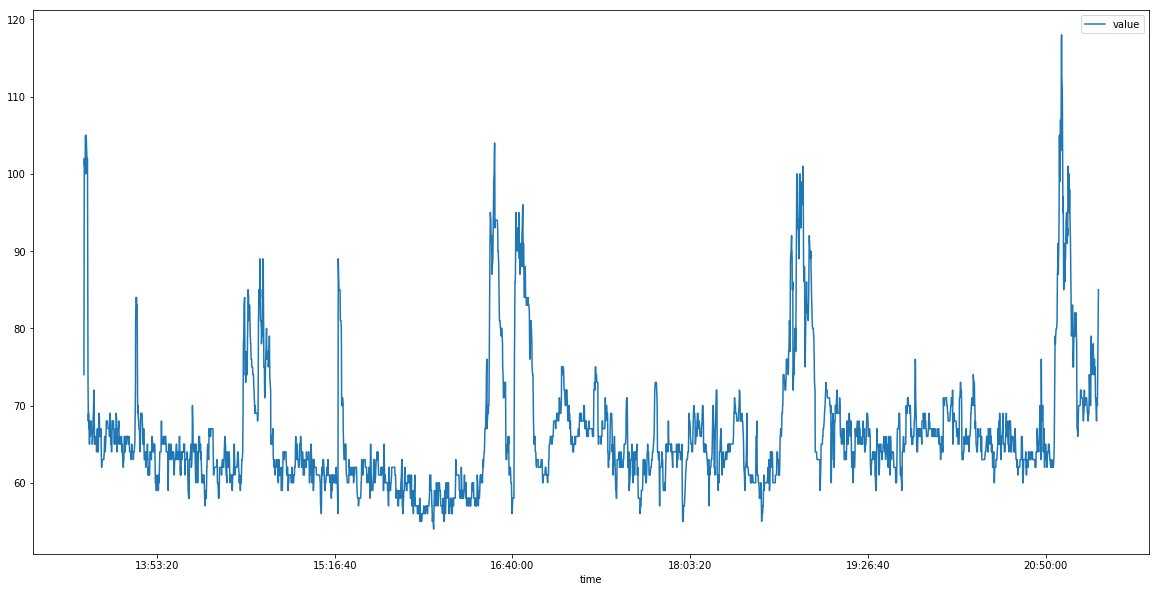

In [8]:

df_hr.plot(x='time',y='value',kind='line',figsize=(20,10))

In [53]:
df_hr['time'].max()

datetime.time(20, 58, 35)